In [1]:
import pandas as pd 
from env import username, password, get_db_url
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Acquire data from the cloud database.  

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.  

**Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.** - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
def new_zillow_data():
    """
    This function will:
    - create a connect_url to mySQL
    - return a df of the given query from the zillow db
    """
    url = get_db_url('zillow')
    SQL_query = '''
                select *,
                    CAST(latitude / 1e6 AS DECIMAL(10, 6)) AS latitude_dd,
                    CAST(longitude / 1e6 AS DECIMAL(10, 6)) AS longitude_dd
                from properties_2017
                join predictions_2017 using (parcelid)
                join propertylandusetype using (propertylandusetypeid)
                left join architecturalstyletype using (architecturalstyletypeid)
                left join airconditioningtype using (airconditioningtypeid)
                left join buildingclasstype using (buildingclasstypeid)
                left join heatingorsystemtype using (heatingorsystemtypeid)
                left join storytype using (storytypeid)
                left join typeconstructiontype using (typeconstructiontypeid)
                left join unique_properties using (parcelid)
                where transactiondate Like '2017%%'
                '''
    return pd.read_sql(SQL_query, url)

In [3]:
def get_zillow_data(filename="zillow.csv"):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - If csv doesn't exists:
        - create a df of the SQL_query
        - write df to csv
    - Output zillow df
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=0) 
        print('Found CSV')
        return df
    
    else:
        df = new_zillow_data()
        
        #want to save to csv
        df.to_csv(filename)
        print('Creating CSV')
        return df


In [4]:
df = get_zillow_data()

Creating CSV


In [5]:
df.shape

(77579, 71)

In [6]:
df[df.duplicated(subset=['parcelid'])].sort_values('parcelid')

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,airconditioningtypeid,architecturalstyletypeid,propertylandusetypeid,id,basementsqft,...,transactiondate,propertylandusedesc,architecturalstyledesc,airconditioningdesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,latitude_dd,longitude_dd
14024,10722858,NaN,NaN,2.0,NaN,NaN,NaN,261.0,16179,NaN,...,2017-07-28,Single Family Residential,None,None,None,Central,None,None,34.195746,-118.624097
13904,10732347,NaN,NaN,2.0,NaN,NaN,NaN,261.0,1836115,NaN,...,2017-07-25,Single Family Residential,None,None,None,Central,None,None,34.176023,-118.614205
2903,10739478,NaN,NaN,2.0,NaN,1.0,NaN,261.0,2119208,NaN,...,2017-03-31,Single Family Residential,None,Central,None,Central,None,None,34.154021,-118.695485
28597,10744507,NaN,NaN,2.0,NaN,NaN,NaN,269.0,1836165,NaN,...,2017-08-31,Planned Unit Development,None,None,None,Central,None,None,34.158402,-118.790700
3538,10753427,NaN,NaN,2.0,NaN,1.0,NaN,266.0,1403445,NaN,...,2017-03-17,Condominium,None,Central,None,Central,None,None,34.151800,-118.643000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29452,17251843,NaN,NaN,NaN,NaN,NaN,NaN,266.0,1731266,NaN,...,2017-06-22,Condominium,None,None,None,None,None,None,34.268000,-118.760000
38836,17280166,NaN,NaN,NaN,NaN,NaN,NaN,261.0,2595690,NaN,...,2017-06-15,Single Family Residential,None,None,None,None,None,None,34.213981,-118.857003
64253,17282392,NaN,NaN,NaN,NaN,NaN,NaN,261.0,2938730,NaN,...,2017-08-25,Single Family Residential,None,None,None,None,None,None,34.190023,-118.868615
4525,17295416,NaN,NaN,NaN,NaN,NaN,NaN,265.0,2506407,NaN,...,2017-05-16,Cluster Home,None,None,None,None,None,None,34.147822,-118.825970


In [7]:
df[df.duplicated('parcelid', keep=False)].sort_values(['parcelid', 'transactiondate'])

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,airconditioningtypeid,architecturalstyletypeid,propertylandusetypeid,id,basementsqft,...,transactiondate,propertylandusedesc,architecturalstyledesc,airconditioningdesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,latitude_dd,longitude_dd
14023,10722858,NaN,NaN,2.0,NaN,NaN,NaN,261.0,16179,NaN,...,2017-03-02,Single Family Residential,None,None,None,Central,None,None,34.195746,-118.624097
14024,10722858,NaN,NaN,2.0,NaN,NaN,NaN,261.0,16179,NaN,...,2017-07-28,Single Family Residential,None,None,None,Central,None,None,34.195746,-118.624097
13903,10732347,NaN,NaN,2.0,NaN,NaN,NaN,261.0,1836115,NaN,...,2017-03-01,Single Family Residential,None,None,None,Central,None,None,34.176023,-118.614205
13904,10732347,NaN,NaN,2.0,NaN,NaN,NaN,261.0,1836115,NaN,...,2017-07-25,Single Family Residential,None,None,None,Central,None,None,34.176023,-118.614205
2902,10739478,NaN,NaN,2.0,NaN,1.0,NaN,261.0,2119208,NaN,...,2017-01-13,Single Family Residential,None,Central,None,Central,None,None,34.154021,-118.695485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64253,17282392,NaN,NaN,NaN,NaN,NaN,NaN,261.0,2938730,NaN,...,2017-08-25,Single Family Residential,None,None,None,None,None,None,34.190023,-118.868615
4524,17295416,NaN,NaN,NaN,NaN,NaN,NaN,265.0,2506407,NaN,...,2017-01-20,Cluster Home,None,None,None,None,None,None,34.147822,-118.825970
4525,17295416,NaN,NaN,NaN,NaN,NaN,NaN,265.0,2506407,NaN,...,2017-05-16,Cluster Home,None,None,None,None,None,None,34.147822,-118.825970
34284,162960529,NaN,NaN,NaN,NaN,NaN,NaN,261.0,2415168,NaN,...,2017-05-09,Single Family Residential,None,None,None,None,None,None,34.245590,-119.169692


In [8]:
import pandas as pd

# Sort the DataFrame by 'parcelid' and 'transactiondate' in descending order
df_sorted = df.sort_values(['parcelid', 'transactiondate'], ascending=[True, False])

# Keep only the first occurrence of each 'parcelid' (most recent transaction date)
df_unique = df_sorted.drop_duplicates('parcelid', keep='first')

# Save the result back to the original DataFrame
df = df_unique.copy()


#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [9]:
df.shape

(77381, 71)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 54984 to 16644
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   airconditioningtypeid         24953 non-null  float64
 6   architecturalstyletypeid      206 non-null    float64
 7   propertylandusetypeid         77381 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 1

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
id,77381.0,1.495139e+06,8.609071e+05,3.490000e+02,7.520700e+05,1.497932e+06,2.240535e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


In [12]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols



def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [13]:
get_object_cols(df)

['propertycountylandusecode',
 'propertyzoningdesc',
 'taxdelinquencyflag',
 'transactiondate',
 'propertylandusedesc',
 'architecturalstyledesc',
 'airconditioningdesc',
 'buildingclassdesc',
 'heatingorsystemdesc',
 'storydesc',
 'typeconstructiondesc']

In [14]:
for col in get_object_cols(df):
    print(f"""*********** Column - {col}: 
{df[col].value_counts()}

______________________________________
""")

*********** Column - propertycountylandusecode: 
0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
010L        1
105         1
020E        1
040B        1
030G        1
Name: propertycountylandusecode, Length: 75, dtype: int64

______________________________________

*********** Column - propertyzoningdesc: 
LAR1          6747
LAR3          2437
LARS          1389
LBR1N         1222
LARD1.5       1127
              ... 
DOR105*          1
DOCP*            1
DOR3-R1500       1
DOR1O5*          1
LCR2000020       1
Name: propertyzoningdesc, Length: 1907, dtype: int64

______________________________________

*********** Column - taxdelinquencyflag: 
Y    2886
Name: taxdelinquencyflag, dtype: int64

______________________________________

*********** Column - transactiondate: 
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-04-08       1
2017-03-12       1
2017-04-15       1
2017-02-18 

#### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [15]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """
    num_missing = df.isnull().sum()
    pct_miss = (num_missing / df.shape[0]) * 100
    cols_missing = pd.DataFrame({
                    'num_rows_missing': num_missing,
                    'percent_rows_missing': pct_miss
                    })
    
    return  cols_missing

In [16]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
parcelid,0,0.000000
typeconstructiontypeid,77159,99.713108
storytypeid,77331,99.935385
heatingorsystemtypeid,27941,36.108347
buildingclasstypeid,77366,99.980615
...,...,...
heatingorsystemdesc,27941,36.108347
storydesc,77331,99.935385
typeconstructiondesc,77159,99.713108
latitude_dd,0,0.000000


In [17]:
def nulls_by_row(df, index_id = 'parcelid'):
    """
    """
    num_missing = df.isnull().sum(axis=1)
    pct_miss = (num_missing / df.shape[1]) * 100
    
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': pct_miss})

    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True).reset_index()[[index_id, 'num_cols_missing', 'percent_cols_missing']]
    
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [18]:
nulls_by_row(df)

,parcelid,num_cols_missing,percent_cols_missing
77378,167687839,48,67.605634
77376,167686999,48,67.605634
60625,14341728,48,67.605634
77380,167689317,47,66.197183
77377,167687739,47,66.197183
...,...,...,...
63634,14466342,24,33.802817
56297,14140297,24,33.802817
56144,14133281,24,33.802817
63620,14465914,23,32.394366


In [19]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    # distribution of numerical attributes
    '''
    print(f"""SUMMARY REPORT
=====================================================
          
          
Dataframe head: 
{df.head(3)}
          
=====================================================
          
          
Dataframe info: """)
    df.info()

    print(f"""=====================================================
          
          
Dataframe Description: 
{df.describe().T}
          
=====================================================


nulls in dataframe by column: 
{nulls_by_col(df)}
=====================================================


nulls in dataframe by row: 
{nulls_by_row(df)}
=====================================================
    
    
DataFrame value counts: 
 """)         
    for col in (get_object_cols(df)): 
        print(f"""******** {col.upper()} - Value Counts:
{df[col].value_counts()}
    _______________________________________""")                   
        
   # fig, axes = plt.subplots(1, len(get_numeric_cols(df)), figsize=(15, 5))
    
    for col in get_numeric_cols(df):
        sns.histplot(df[col])
        plt.title(f'Histogram of {col}')
        plt.show()

SUMMARY REPORT
          
          
Dataframe head: 
       parcelid  typeconstructiontypeid  storytypeid  heatingorsystemtypeid  \
54984  10711855                     NaN          NaN                    2.0   
71352  10711877                     NaN          NaN                    2.0   
23196  10711888                     NaN          NaN                    2.0   

       buildingclasstypeid  airconditioningtypeid  architecturalstyletypeid  \
54984                  NaN                    NaN                       NaN   
71352                  NaN                    1.0                       NaN   
23196                  NaN                    1.0                       NaN   

       propertylandusetypeid       id  basementsqft  ...  transactiondate  \
54984                  261.0  1087254           NaN  ...       2017-07-07   
71352                  261.0  1072280           NaN  ...       2017-08-29   
23196                  261.0  1340933           NaN  ...       2017-04-04   

   

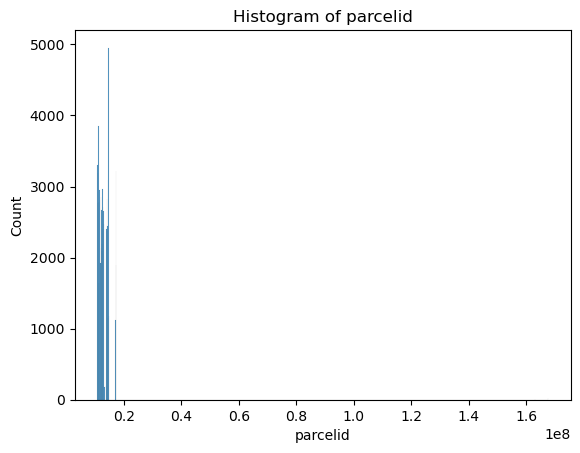

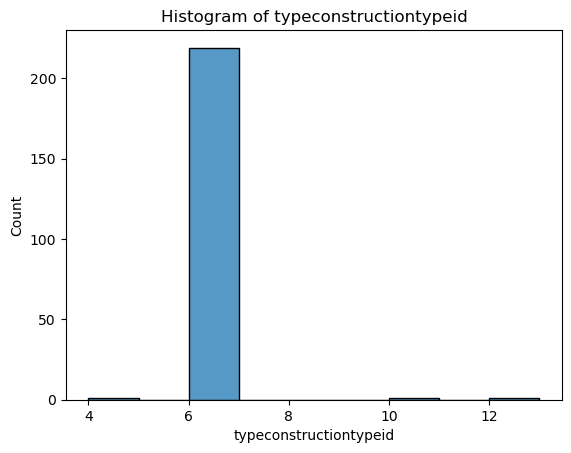

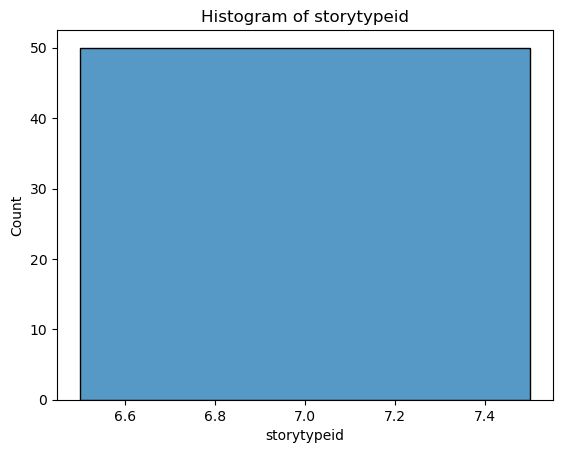

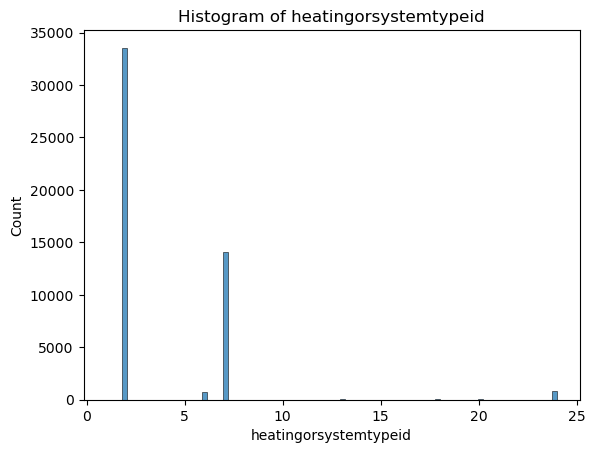

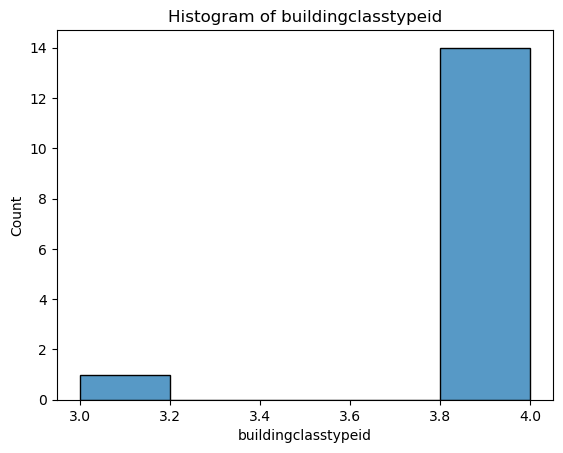

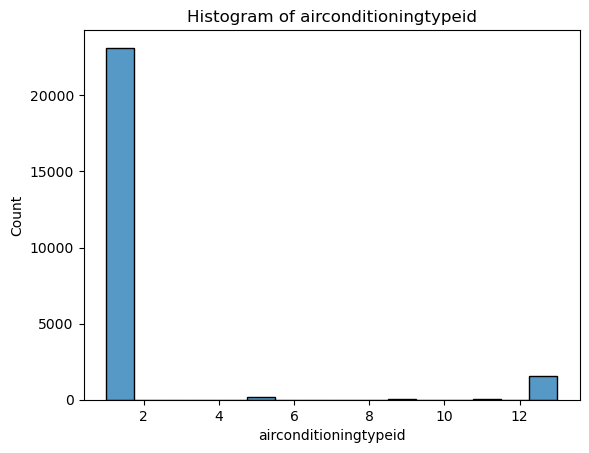

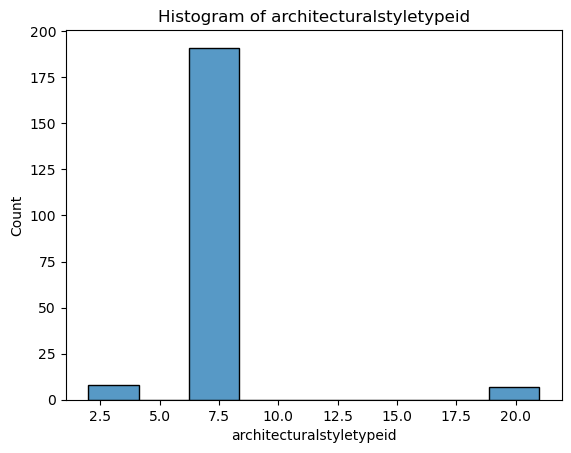

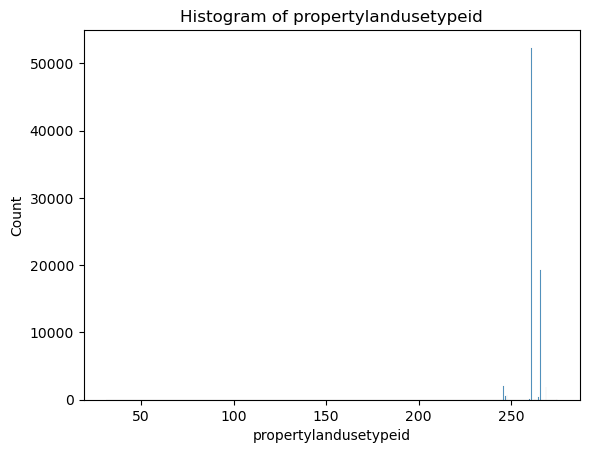

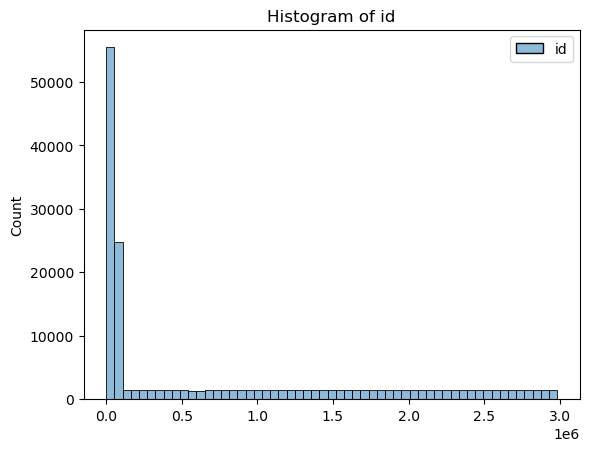

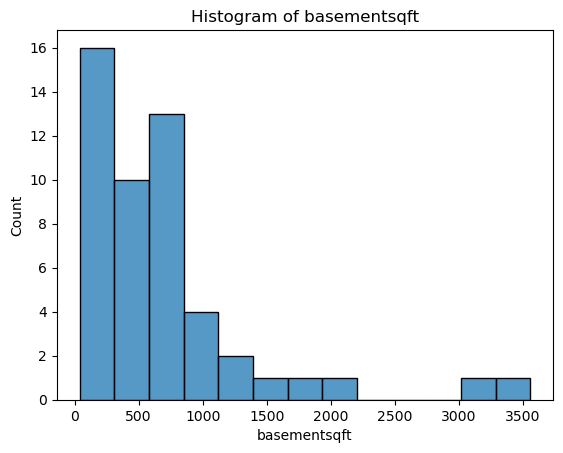

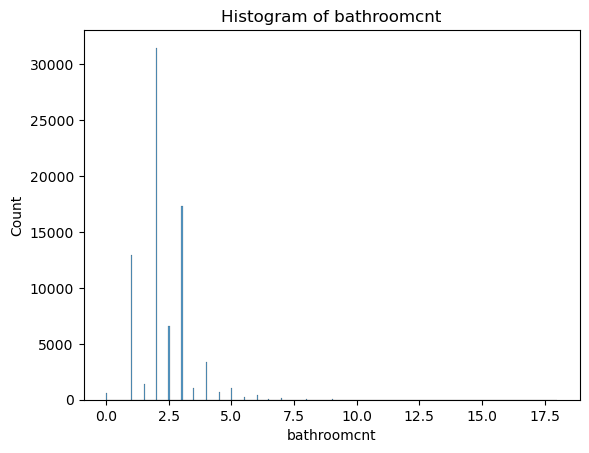

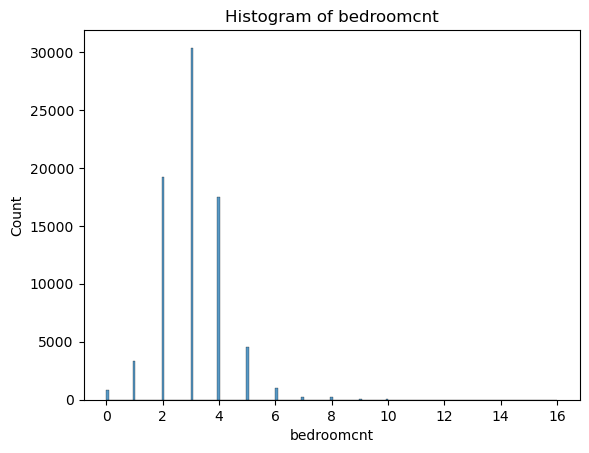

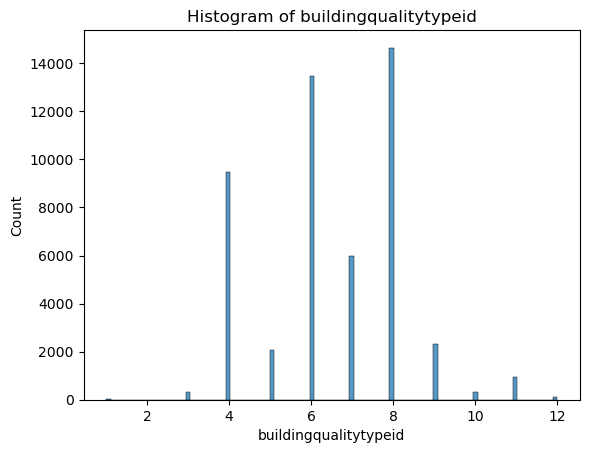

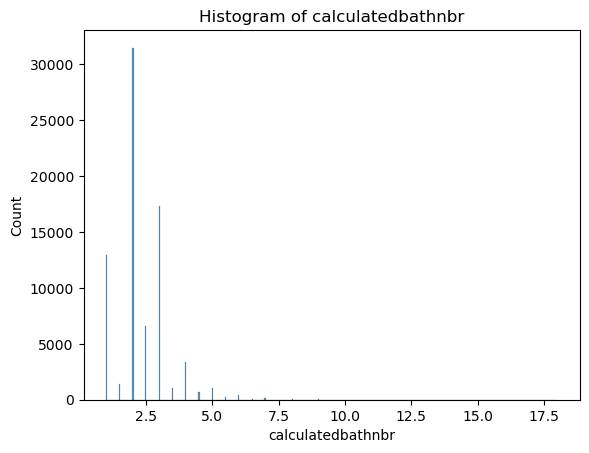

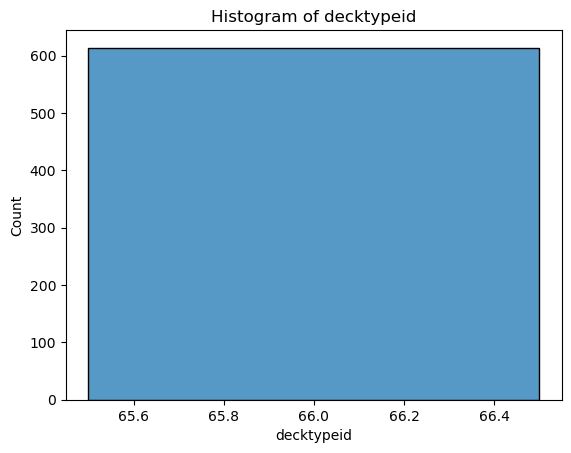

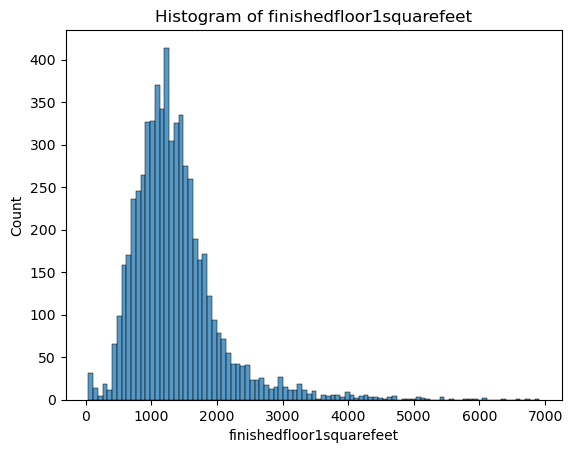

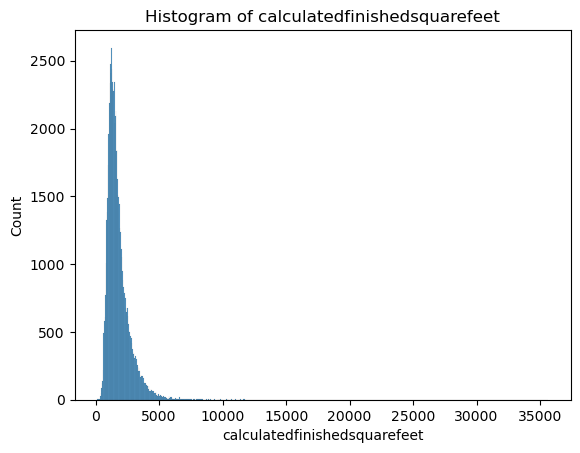

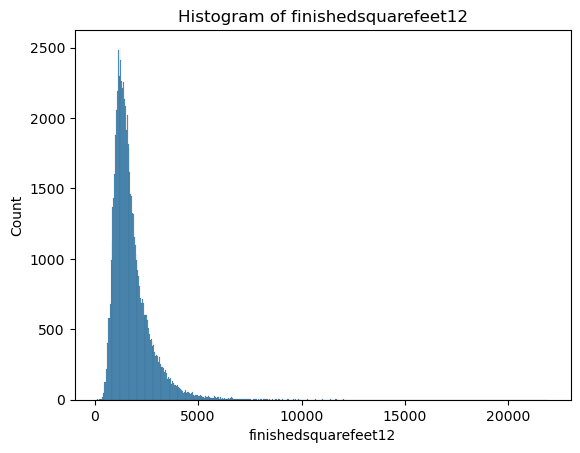

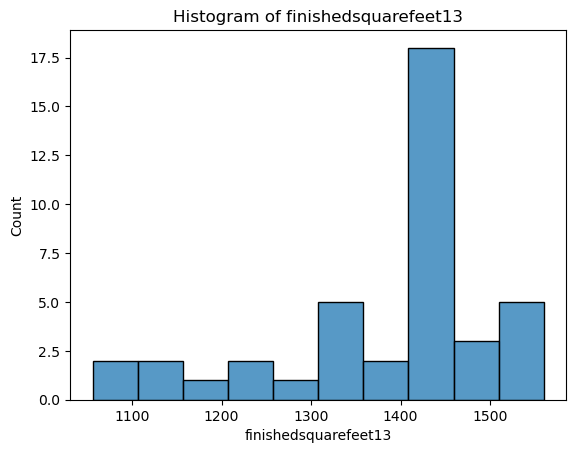

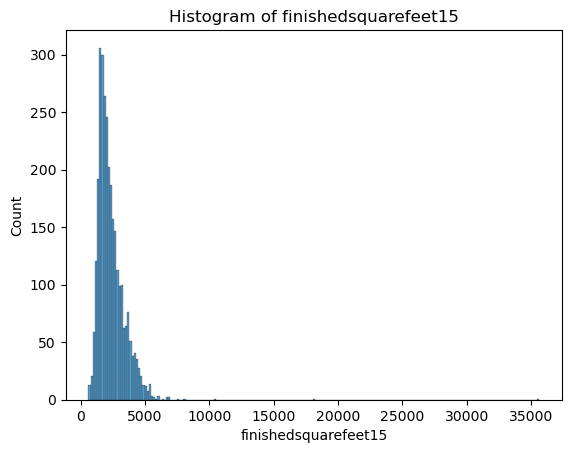

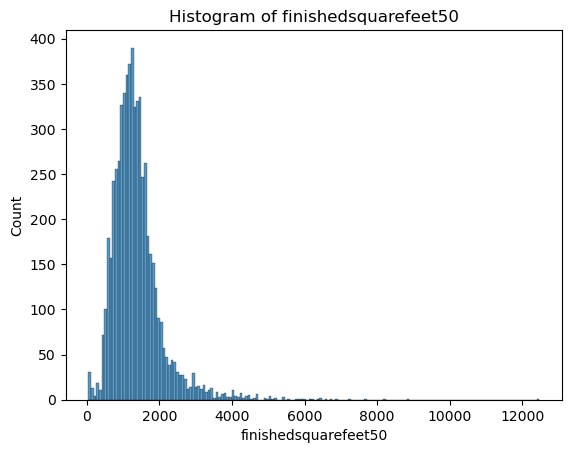

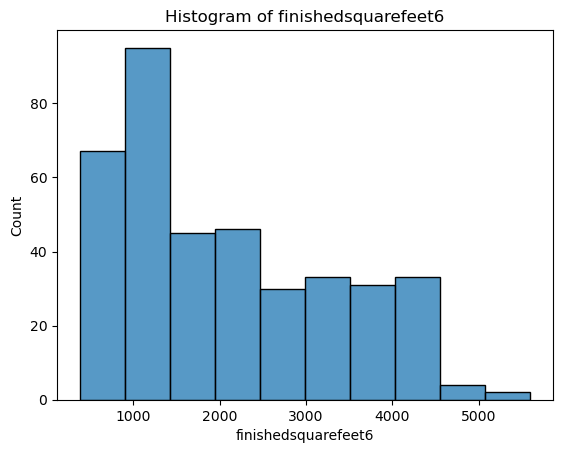

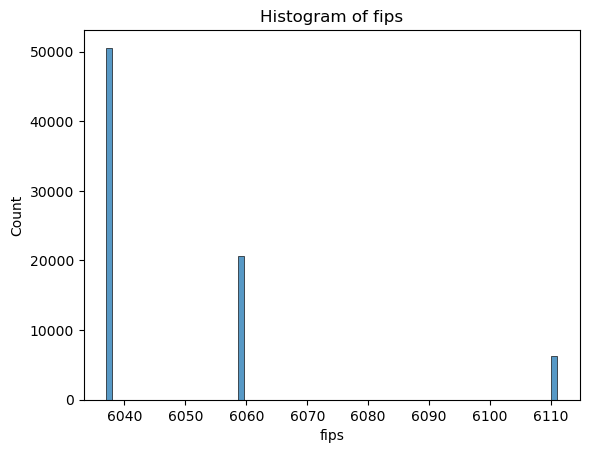

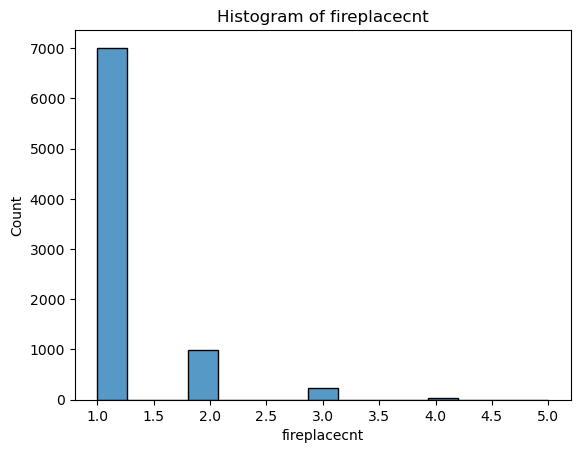

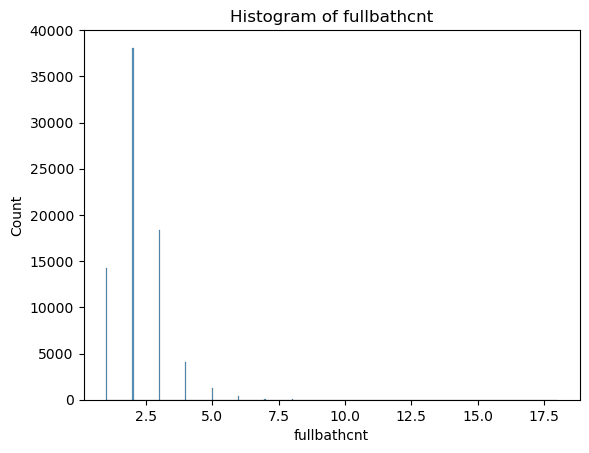

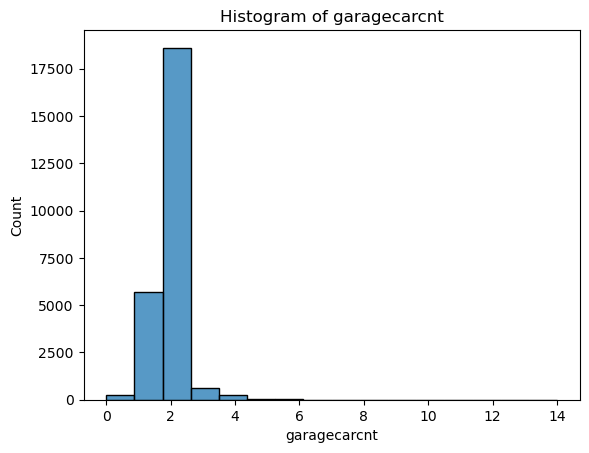

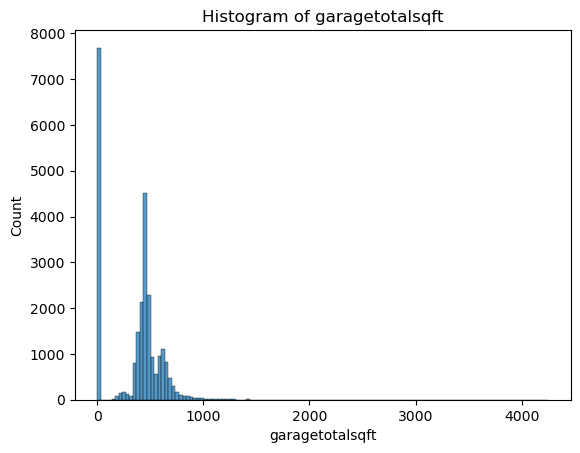

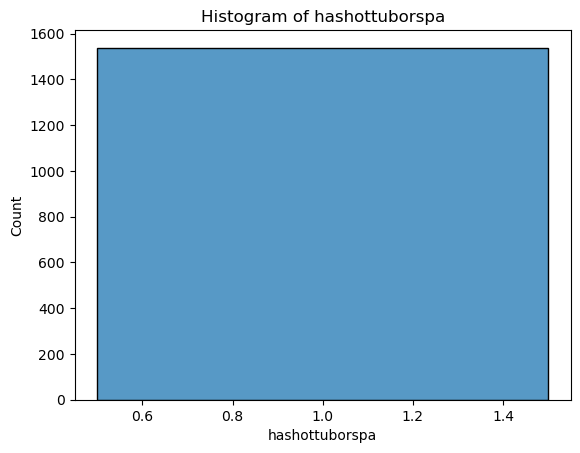

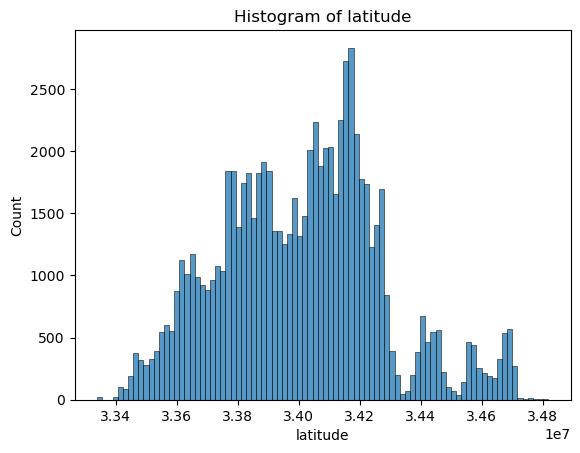

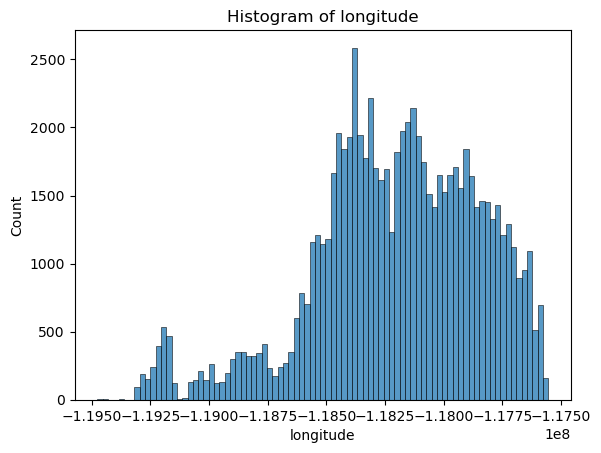

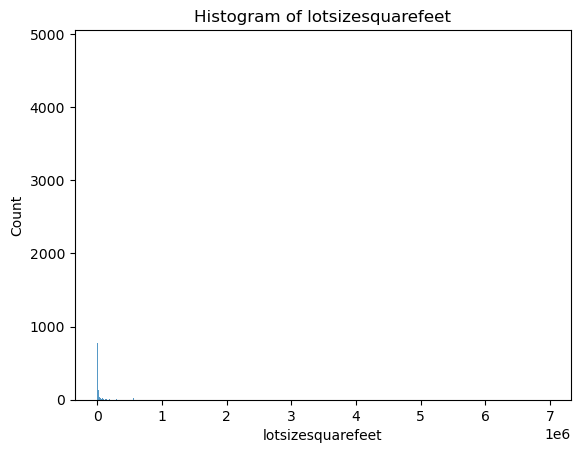

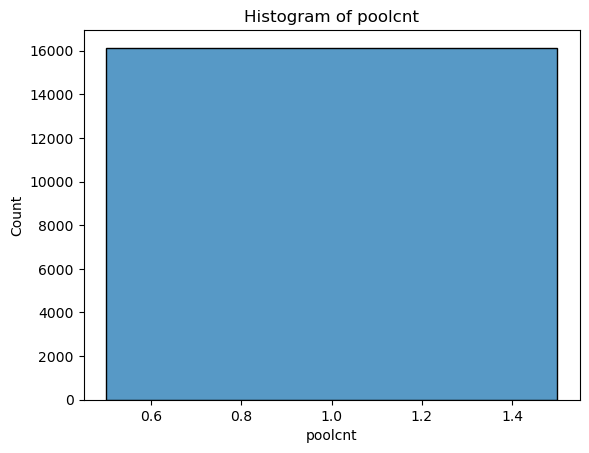

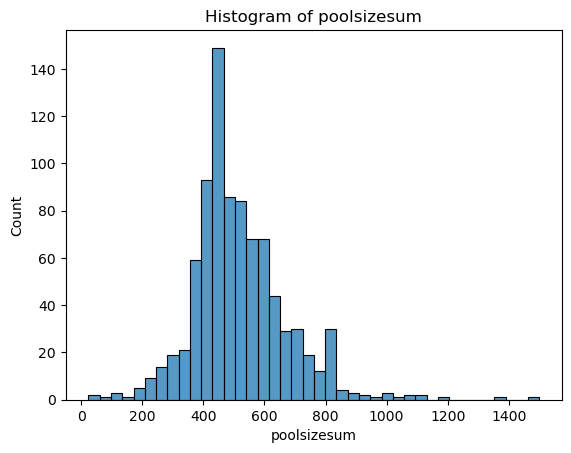

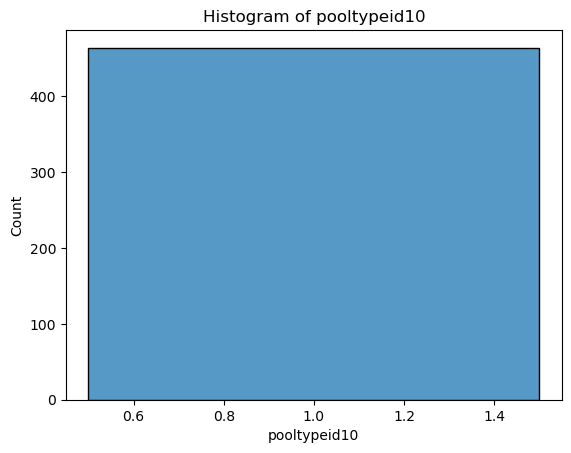

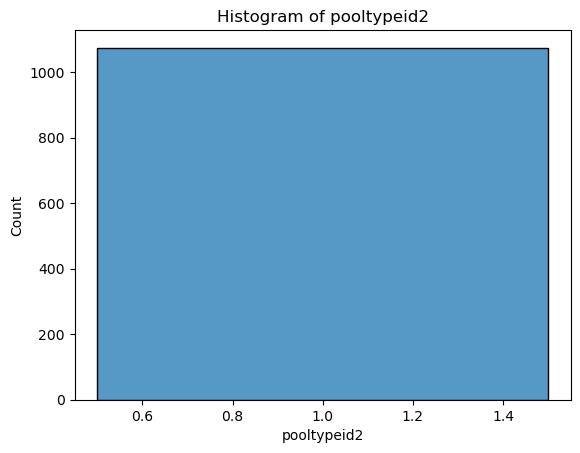

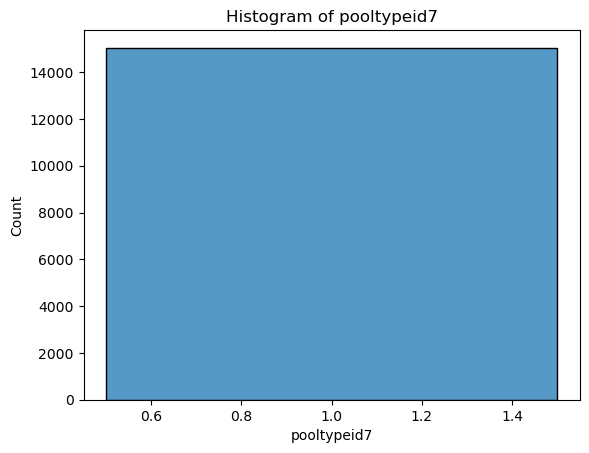

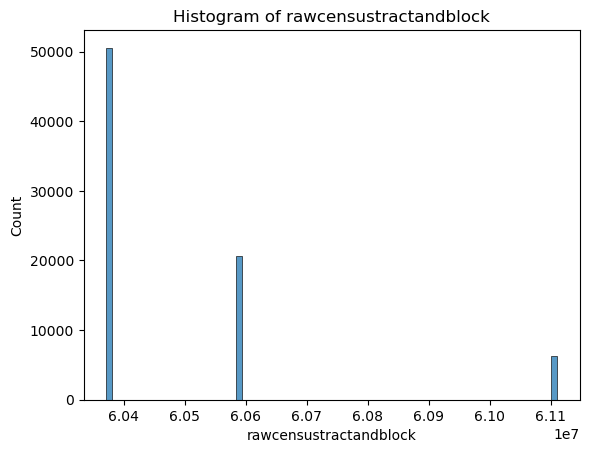

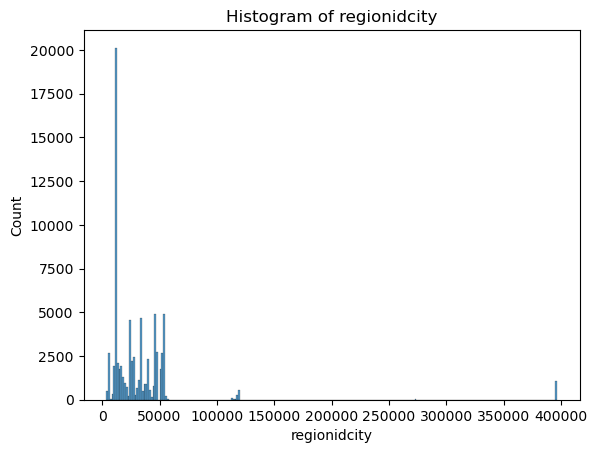

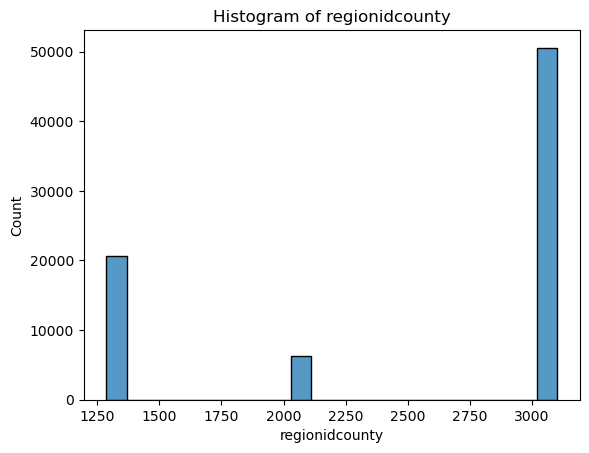

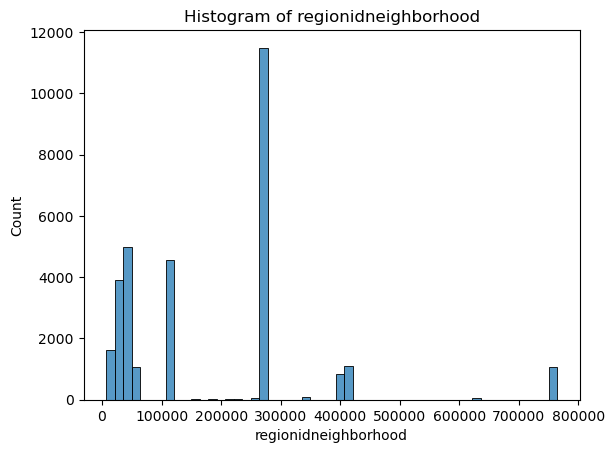

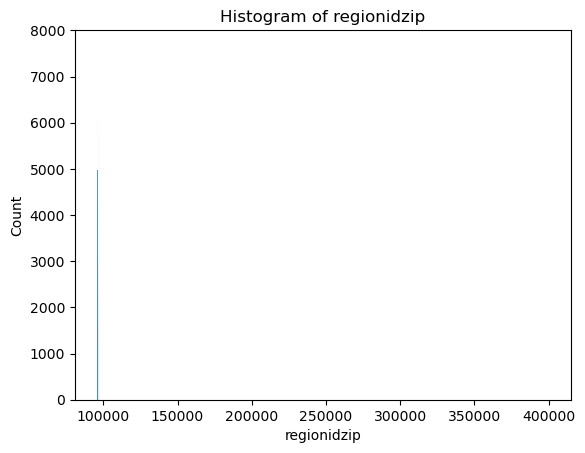

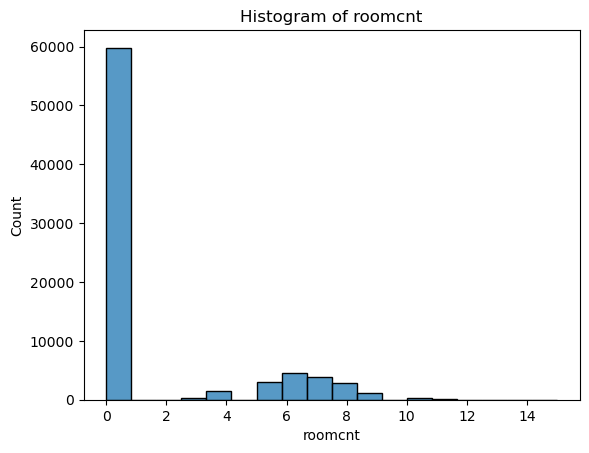

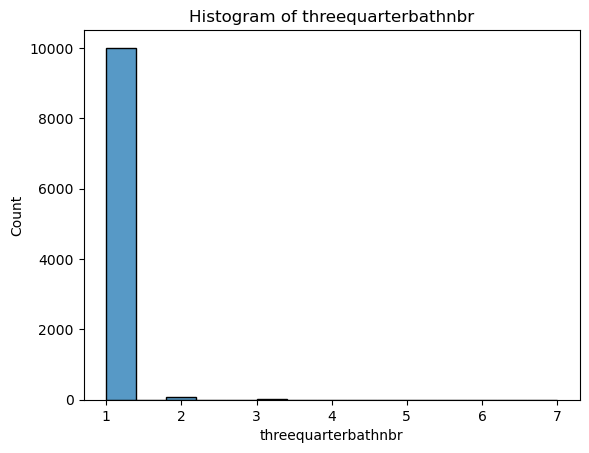

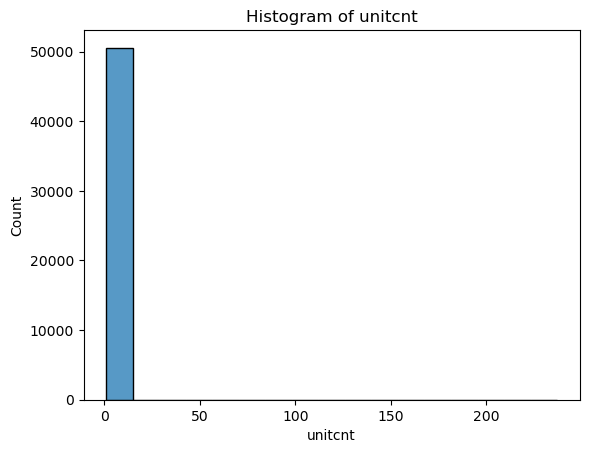

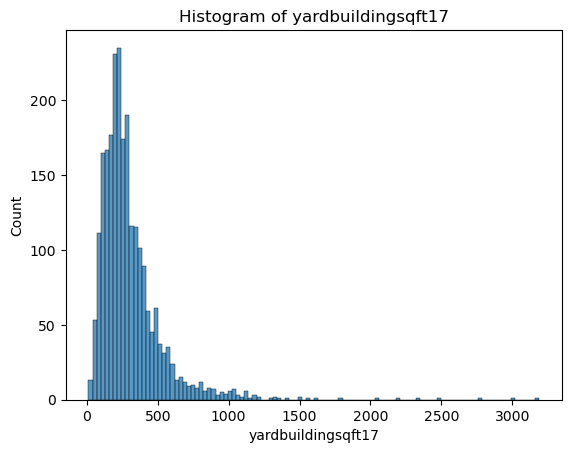

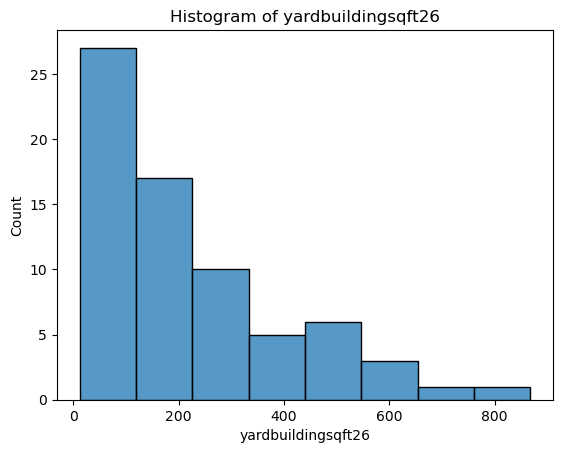

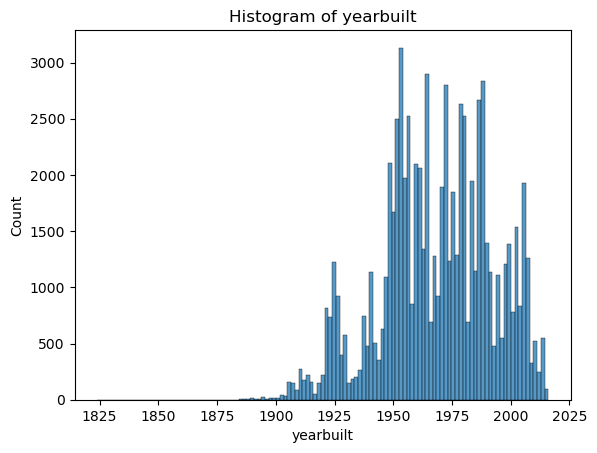

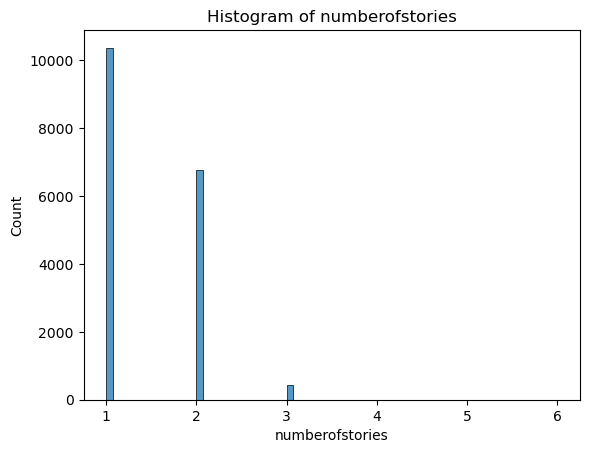

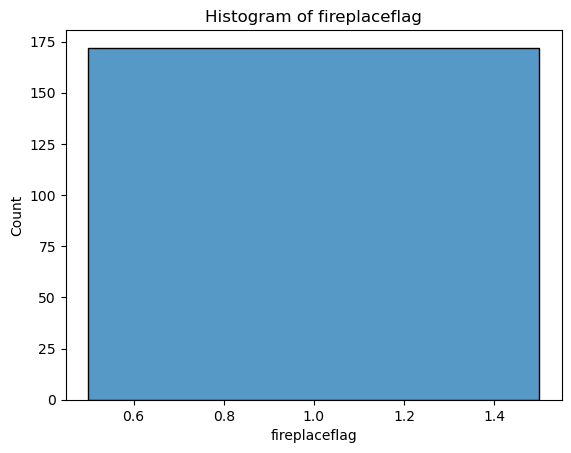

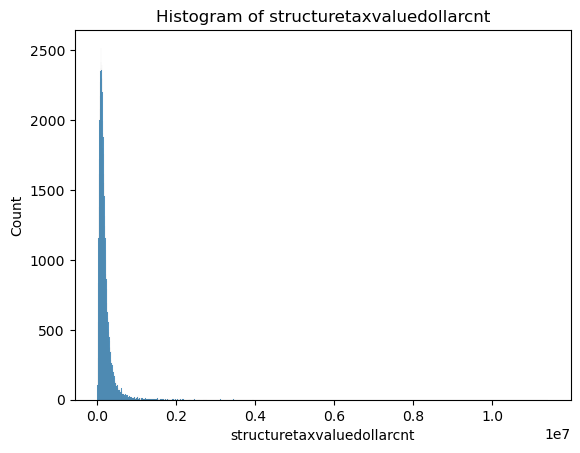

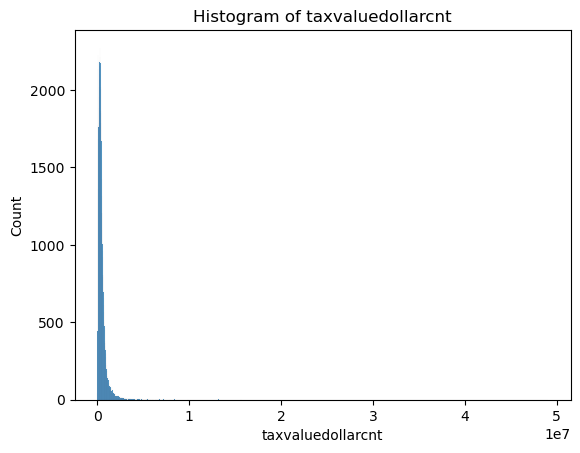

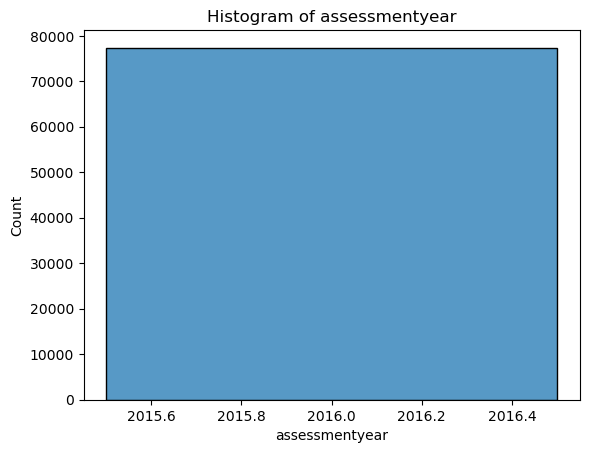

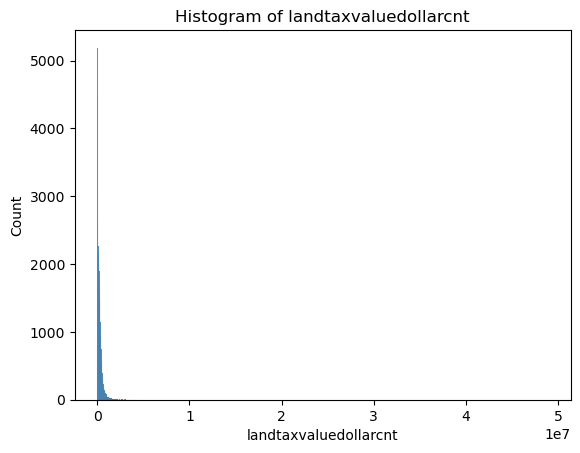

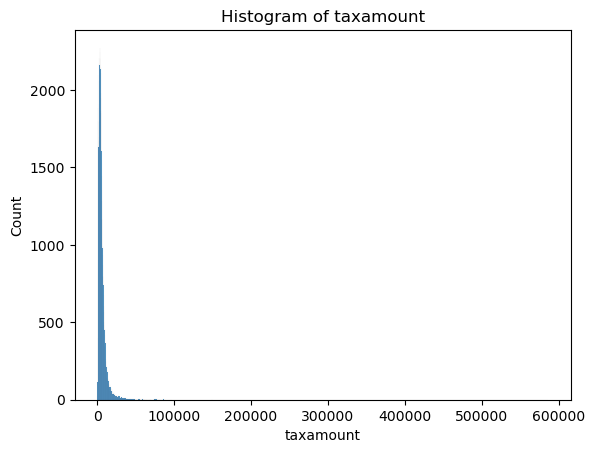

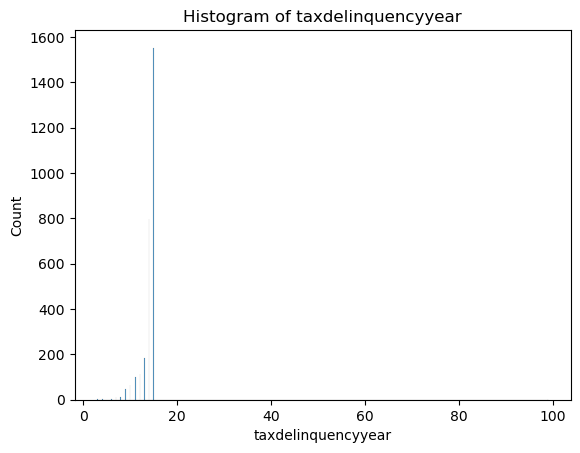

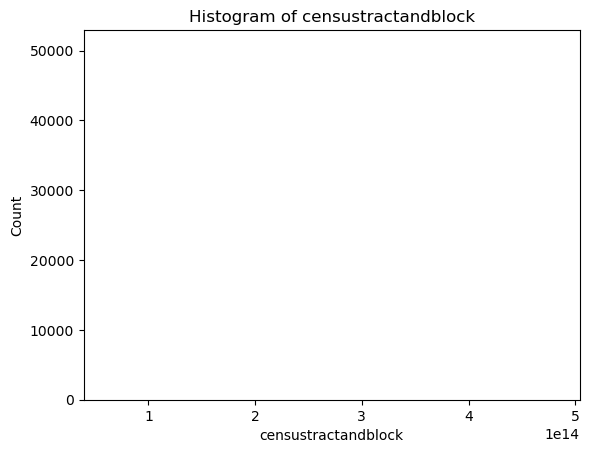

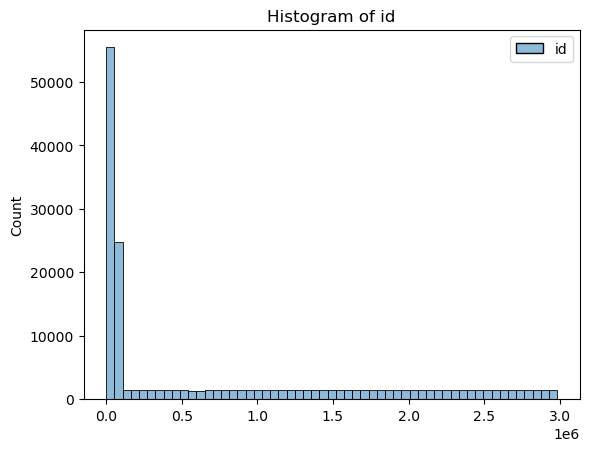

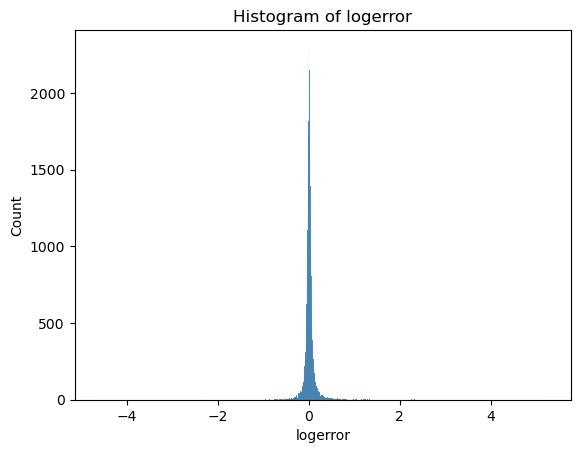

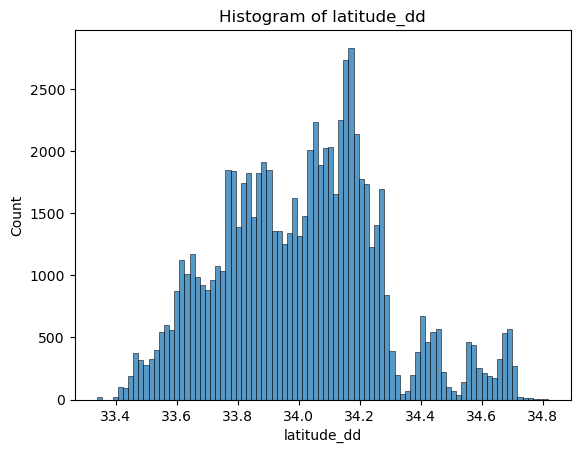

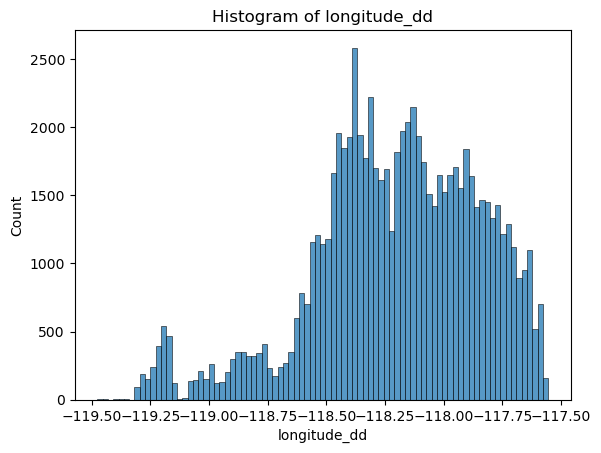

In [20]:
summarize(df)

#### Prepare

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [21]:
df = df[df.propertylandusedesc == 'Single Family Residential']
df.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,airconditioningtypeid,architecturalstyletypeid,propertylandusetypeid,id,basementsqft,...,transactiondate,propertylandusedesc,architecturalstyledesc,airconditioningdesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,latitude_dd,longitude_dd
54984,10711855,NaN,NaN,2.0,NaN,NaN,NaN,261.0,1087254,NaN,...,2017-07-07,Single Family Residential,None,None,None,Central,None,None,34.222559,-118.617387
71352,10711877,NaN,NaN,2.0,NaN,1.0,NaN,261.0,1072280,NaN,...,2017-08-29,Single Family Residential,None,Central,None,Central,None,None,34.220261,-118.616409
23196,10711888,NaN,NaN,2.0,NaN,1.0,NaN,261.0,1340933,NaN,...,2017-04-04,Single Family Residential,None,Central,None,Central,None,None,34.222491,-118.616854
18007,10711910,NaN,NaN,2.0,NaN,NaN,NaN,261.0,1878109,NaN,...,2017-03-17,Single Family Residential,None,None,None,Central,None,None,34.221864,-118.615739
20366,10711923,NaN,NaN,2.0,NaN,NaN,NaN,261.0,2190858,NaN,...,2017-03-24,Single Family Residential,None,None,None,Central,None,None,34.220619,-118.615253


Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [22]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75):
    """
    This function will:
    - take in: 
        - a dataframe
        - column threshold (defaulted to 0.5)
        - row threshold (defaulted to 0.75)
    - calculates the minimum number of non-missing values required for each column/row to be retained
    - drops columns/rows with a high proportion of missing values.
    - returns the new df
    """
    
    column_threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=column_threshold)
    
    row_threshold = int(round(prop_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=row_threshold)
    
    return df

In [23]:
df = handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75)
df.head()

,parcelid,heatingorsystemtypeid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,latitude_dd,longitude_dd
54984,10711855,2.0,261.0,1087254,2.0,3.0,8.0,2.0,2107.0,2107.0,...,374484.0,7659.36,6.037113e+13,55006,-0.007357,2017-07-07,Single Family Residential,Central,34.222559,-118.617387
71352,10711877,2.0,261.0,1072280,2.0,4.0,8.0,2.0,1882.0,1882.0,...,407000.0,8123.91,6.037113e+13,71382,0.021066,2017-08-29,Single Family Residential,Central,34.220261,-118.616409
23196,10711888,2.0,261.0,1340933,2.0,4.0,8.0,2.0,1882.0,1882.0,...,285332.0,6673.24,6.037113e+13,23209,0.077174,2017-04-04,Single Family Residential,Central,34.222491,-118.616854
18007,10711910,2.0,261.0,1878109,2.0,3.0,8.0,2.0,1477.0,1477.0,...,20063.0,1116.46,6.037113e+13,18017,-0.041238,2017-03-17,Single Family Residential,Central,34.221864,-118.615739
20366,10711923,2.0,261.0,2190858,2.0,4.0,8.0,2.0,1918.0,1918.0,...,247590.0,5239.85,6.037113e+13,20378,-0.009496,2017-03-24,Single Family Residential,Central,34.220619,-118.615253


In [24]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
parcelid,0,0.000000
heatingorsystemtypeid,18406,35.222750
propertylandusetypeid,0,0.000000
id,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingqualitytypeid,18601,35.595912
calculatedbathnbr,71,0.135870
calculatedfinishedsquarefeet,17,0.032532
finishedsquarefeet12,182,0.348285


In [25]:
def remove_columns(df, cols_to_remove):
    """
    This function will:
    - take in a df and list of columns
    - drop the listed columns
    - return the new df
    """
    df = df.drop(columns=cols_to_remove)
    return df

In [26]:
def data_prep(df, cols_to_remove=[], prop_required_columns=0.5, prop_required_rows=0.75):
    """
    This function will:
    - take in: 
        - a dataframe
        - list of columns
        - column threshold (defaulted to 0.5)
        - row threshold (defaulted to 0.75)
    - removes unwanted columns
    - remove rows and columns that contain a high proportion of missing values
    - returns cleaned df
    """
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_columns, prop_required_rows)
    return df

In [27]:
clean_df = data_prep(
            df,
            cols_to_remove=['heatingorsystemtypeid', 'buildingqualitytypeid','propertyzoningdesc',
                   'unitcnt','heatingorsystemdesc', 'id'], 
            prop_required_columns= .50,
            prop_required_rows= .75
)
clean_df.T

,54984,71352,23196,18007,20366,6497,53595,15602,63031,11376,...,75126,9787,13199,10121,72777,54766,4178,62547,46143,35541
parcelid,10711855,10711877,10711888,10711910,10711923,10711945,10711956,10711995,10712005,10712007,...,167636339,167636468,167636496,167636512,167636726,167636727,167637054,167637371,167638003,167639152
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,...,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0
bathroomcnt,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,3.0,3.0,3.0,4.0,2.0,3.0,1.0,5.0,3.0,4.0
bedroomcnt,3.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,...,3.0,4.0,5.0,5.0,3.0,4.0,2.0,4.0,3.0,5.0
calculatedbathnbr,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,3.0,3.0,3.0,4.0,2.0,3.0,1.0,5.0,3.0,4.0
calculatedfinishedsquarefeet,2107.0,1882.0,1882.0,1477.0,1918.0,2031.0,1678.0,1882.0,1709.0,1639.0,...,2815.0,2239.0,2157.0,2608.0,1537.0,2670.0,756.0,4000.0,2108.0,4232.0
finishedsquarefeet12,2107.0,1882.0,1882.0,1477.0,1918.0,2031.0,1678.0,1882.0,1709.0,1639.0,...,2815.0,2239.0,2157.0,2608.0,1537.0,2670.0,756.0,4000.0,2108.0,4232.0
fips,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,...,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0
fullbathcnt,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,3.0,3.0,3.0,4.0,2.0,3.0,1.0,5.0,3.0,4.0
latitude,34222559.0,34220261.0,34222491.0,34221864.0,34220619.0,34220664.0,34224186.0,34223458.0,34224173.0,34224530.0,...,34443504.0,34424104.0,34424104.0,34424104.0,34688663.0,34681736.0,33863071.0,34089958.0,34126076.0,33981300.0


In [28]:
nulls_by_col(clean_df)

,num_rows_missing,percent_rows_missing
parcelid,0,0.000000
propertylandusetypeid,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
calculatedbathnbr,71,0.135870
calculatedfinishedsquarefeet,17,0.032532
finishedsquarefeet12,182,0.348285
fips,0,0.000000
fullbathcnt,71,0.135870
latitude,0,0.000000


In [29]:
clean_df.shape

(52256, 30)

In [30]:
clean_df.isnull().sum()

parcelid                           0
propertylandusetypeid              0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                 71
calculatedfinishedsquarefeet      17
finishedsquarefeet12             182
fips                               0
fullbathcnt                       71
latitude                           0
longitude                          0
lotsizesquarefeet                357
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1030
regionidcounty                     0
regionidzip                       23
roomcnt                            0
yearbuilt                         50
structuretaxvaluedollarcnt        74
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              112
logerror                           0
transactiondate                    0
p

In [31]:
clean_df = clean_df.dropna()
clean_df.T

,54984,71352,23196,18007,20366,6497,53595,15602,63031,11376,...,20729,25066,25448,7183,46147,47232,33946,34285,58182,38213
parcelid,10711855,10711877,10711888,10711910,10711923,10711945,10711956,10711995,10712005,10712007,...,17300810,17300814,17300849,17300850,17300860,17300863,162960516,162960529,162960596,162960814
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,...,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0
bathroomcnt,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,8.0,3.5,2.5,3.5,3.0,5.5,2.5,4.0,2.0,3.0
bedroomcnt,3.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,...,5.0,4.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,5.0
calculatedbathnbr,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,8.0,3.5,2.5,3.5,3.0,5.5,2.5,4.0,2.0,3.0
calculatedfinishedsquarefeet,2107.0,1882.0,1882.0,1477.0,1918.0,2031.0,1678.0,1882.0,1709.0,1639.0,...,5076.0,3238.0,2825.0,3080.0,2560.0,4983.0,1449.0,2459.0,1379.0,2754.0
finishedsquarefeet12,2107.0,1882.0,1882.0,1477.0,1918.0,2031.0,1678.0,1882.0,1709.0,1639.0,...,5076.0,3238.0,2825.0,3080.0,2560.0,4983.0,1449.0,2459.0,1379.0,2754.0
fips,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,...,6111.0,6111.0,6111.0,6111.0,6111.0,6111.0,6111.0,6111.0,6111.0,6111.0
fullbathcnt,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,8.0,3.0,2.0,3.0,3.0,5.0,2.0,4.0,2.0,3.0
latitude,34222559.0,34220261.0,34222491.0,34221864.0,34220619.0,34220664.0,34224186.0,34223458.0,34224173.0,34224530.0,...,34214164.0,34212401.0,34201181.0,34201140.0,34201039.0,34199005.0,34273914.0,34245590.0,34219587.0,34258186.0


In [32]:
clean_df.isnull().sum()

parcelid                        0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
latitude_dd                     0
longitude_dd  

In [33]:
clean_df.shape

(50560, 30)

## Outliers

In [ ]:
def get_upper_outliers(s, m=1.5):
    '''
    Given a series and a cutoff value, m, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + (m * iqr)
    
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [ ]:
def add_upper_outlier_columns(df, m=1.5):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], m)
    return df

In [ ]:
df = add_upper_outlier_columns(df)

In [ ]:
df.head()

In [ ]:
outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]

for col in outlier_cols:
    subset = df[col][df[col] > 0]
    print(f"""{col} : 
Number of Observations Above Upper Bound: {subset.count()}
          
{subset.describe()}
------
         """)

In [ ]:
def outlier(df, feature, m=1.5):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    return upper_bound, lower_bound

In [ ]:
# need to update these names
annincUP, annincLOW = outlier(df, 'annual_income')

In [ ]:
# need to update names
annincUP, annincLOW 